<font color='red'>D</font>igital <font color='red'>I</font>maging and <font color='red'>CO</font>mmunications in <font color='red'>M</font>edicine - <font color='red'>DICOM</font>

DICOM images are consisting of - 
<li>Patient information</li>
<li>Image acquisition method</li>
<li>Images as pixels</li>

### Loading libraries

In [1]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.2 MB/s 


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading a dicom file

In [4]:
dcm = pydicom.dcmread('/content/drive/My Drive/Analytics Vidhya Computer Vision Workshop/images/dicom_00023075_033.dcm')

In [5]:
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.167144088560981875590694938780706491173530
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.167144088560981875590694938780706491173530
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Mass'
(0010, 0020) Patient ID  

### Extracting images from a dicom file

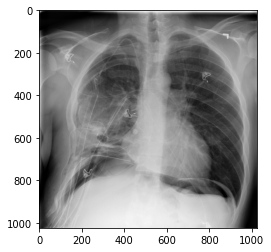

In [6]:
plt.imshow(dcm.pixel_array, cmap='gray')

### Creating pixel intensity of above image

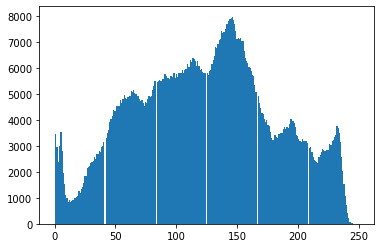

In [7]:
plt.hist(dcm.pixel_array.ravel(), bins = 256);

<font color='red'>What is the mean pixel intensity of above histogram?</font>

In [8]:
mean_intensity = np.mean(dcm.pixel_array)
print('mean intensity: ', mean_intensity)

std_intensity = np.std(dcm.pixel_array)
print('standard deviation of intensity: ', std_intensity)

new_img = dcm.pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity

mean intensity:  123.25588417053223
standard deviation of intensity:  57.47256019573095


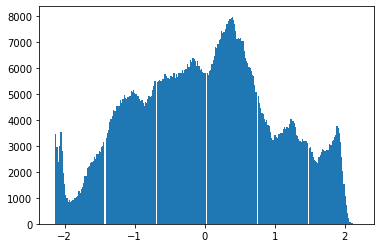

In [9]:
plt.hist(new_img.ravel(), bins = 256);

### Visualizing the affected area only

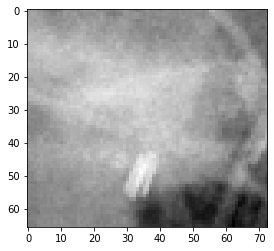

In [10]:
plt.imshow(dcm.pixel_array[535:(535+66), 240:(240+73)], cmap='gray')

### Now plotting the normalized intensity values for the affected area in the image

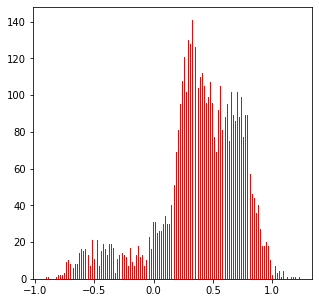

In [11]:
plt.figure(figsize=(5,5))
plt.hist(new_img[535:(535+66),240:(240+73)].ravel(), bins = 256, color='red');

<font color='red'>Compare the pixel intensities of this pixels of affected area to the pixel intensities of complete image. What is your observation?</font>

### Extracting non-image information from dicom files

In [12]:
import glob

my_dicoms = glob.glob("/content/drive/My Drive/Analytics Vidhya Computer Vision Workshop/images/*.dcm")

In [13]:
pydicom.dcmread(my_dicoms[0])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.185126564350931428005573856598500696723485
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.185126564350931428005573856598500696723485
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Infiltration|Nodule'
(0010, 002

In [14]:
all_data = []

for i in my_dicoms: 
    dcm = pydicom.dcmread(i)
    fields = [dcm.PatientID, int(dcm.PatientAge), dcm.PatientSex, dcm.Modality, dcm.StudyDescription,
             dcm.Rows, dcm.Columns]
    all_data.append(fields)

In [15]:
my_data = pd.DataFrame(all_data, columns = ['PatientID','PatientAge','PatientSex','Modality','Findings','Rows','Columns'])
my_data

,PatientID,PatientAge,PatientSex,Modality,Findings,Rows,Columns
0,1688,59,F,DX,Infiltration|Nodule,1024,1024
1,5066,52,M,DX,Cardiomegaly|Effusion|Infiltration,1024,1024
2,10172,59,F,DX,Atelectasis|Effusion,1024,1024
3,13118,69,M,DX,Atelectasis,1024,1024
4,13659,62,F,DX,Consolidation|Mass|Pneumonia|Pneumothorax,1024,1024
5,23075,31,M,DX,Mass,1024,1024
6,29579,24,F,DX,Effusion|Nodule|Pleural_Thickening|Mass,1024,1024
